<a href="https://colab.research.google.com/github/Anand11500/bike-sharing-deamd-predicatons/blob/main/Bike_sharing_demand_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Indivisual
##### **Name -**    Anand salunkhe

# **Project Summary -**

The Bike Sharing Demand Prediction project aims to develop a machine learning model that accurately predicts the demand for bike rentals based on various factors such as weather conditions, time of day, day of the week, and holiday information.

The project involves several key steps, including data exploration and cleaning, feature engineering, model selection and training, and model evaluation.

For feature engineering, various techniques such as one-hot encoding, scaling, and normalization are used to prepare the data for modeling. Several regression models such as Linear Regression, decison tree,Random Forest, and Xg boost are trained and evaluated using various performance metrics such as mean squared error and R-squared value

The final model is selected based on its performance on the evaluation metrics and is used to predict bike rental demand for future time periods. The results are presented in a user-friendly format, allowing the bike sharing service to make informed decisions regarding resource allocation and pricing strategies.

# **GitHub Link -**

https://github.com/Anand11500

# **Problem Statement**


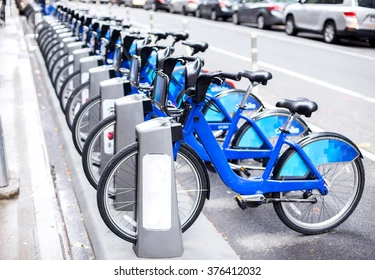

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# ML eveluation library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# ML Model implementation library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import plot_tree



import warnings

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = ('/content/drive/MyDrive/Capstone 2 Bike sharing demand predication/SeoulBikeData.csv')
dataset = pd.read_csv(path, encoding = "ISO-8859-1")
     

### Dataset First View

viewing the data of first five rows

In [ ]:
dataset.head()

viewing the data of bottom five rows

In [ ]:
dataset.tail()

### Dataset Rows & Columns count

 Getting the shape of dataset with rows and columns

In [ ]:
print(dataset.shape)

### Dataset Information

*   Date : year-month-day 

*   Rented Bike Count : Count of bikes rented at each hour

*   Hour : Hour of the day

*   Temperature(°C) : Temperature in Celsius

*   Humidity(%) : Relative Humidity%

*   Wind speed (m/s) : Average Speed of the wind(m/s)

*   Visibility (10m) : 10meter

*   Dew point temperature(°C) : Celsius

*  Solar Radiation (MJ/m2) : Megajoules/meter*meter

*   Rainfall(mm) : millimetre

*   Snowfall (cm) : centimeter

*   Seasons : Winter, Spring, Summer, Autumn

*   Holiday : Holiday/No holiday

*   Functioning Day : NoFunc(Non Functional Hours), Fun(Functional hours)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()
     

there is no duplicate value persent into it.

#### Missing Values/Null Values

In [ ]:

# Missing Values/Null Values Count
dataset.isnull().sum()

that there is no null values is our data.

### What did you know about your dataset?

*   SeoulBikeData' is having 8760 rows and 14 columns and does not have any null value.


*   There are no duplicate values present in both the datasets.



*    there is no null values is our data.



## ***2. Understanding Your Variables***

In [ ]:
dataset.columns

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
dataset.nunique()  
     

## 3. ***Data Wrangling***

Data wrangling is the process of cleaning, transforming, and preparing raw data for analysis

### Data Wrangling Code

In [ ]:
dataset.head()

In [ ]:
# Write your code to make your dataset analysis ready.
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()


In [ ]:
# We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.

dataset['weekdays_weekend']=dataset['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )


In [ ]:
# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
dataset=dataset.drop(columns=['Date','day','year'],axis=1)

In [ ]:
 #Numeric Features

numeric_features= dataset.select_dtypes(exclude='object')
numeric_features

### What all manipulations have you done and insights you found?

 Here we have deleted Data column which contain data/Month/Year from the dataset and add a new column that is Month to make easy to find the insights.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***



#### Chart - 1 Month

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=dataset,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

I picked the specific barplot chart because it clearly illustrates the data. It is easy to compare the differences between each group, and it also allows for a quick comparison of the overall results.



##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months

#### Chart - 2  Hour

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### 1. Why did you pick the specific chart?

The pointplot function is used to create a two-dimensional plot of points.this method shows the eastimation and confidence interval of two points

##### 2. What is/are the insight(s) found from the chart?

From the above point plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases

#### Chart - 3  Seasons

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=dataset,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups so we used box plot



##### 2. What is/are the insight(s) found from the chart?

In summer season the use of rented bike is high In winter season the use of rented bike is very low

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

in that i find out that the summer season use rented bike is high so we provided maximum bike for summer season

#### Chart - 4  Holiday

In [ ]:
dataset.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1)

##### 1. Why did you pick the specific chart?

pie chart is used represent and the percenrage of set time



##### 2. What is/are the insight(s) found from the chart?


In the above pie plot which shows the use of rented bike in a holiday is less than non- hoilday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes I observed through the pie chart that holiday had less less use of rented bike

#### Chart - 5 Snowfall

In [ ]:
plt.figure(figsize=(8,8))
sns.catplot(x='Snowfall (cm)',y='Rented Bike Count',data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?


catplot is used to create categorical plots, which allow you to visualize the distribution of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

we can see that if if there is snowfall then there is decrease in the demond on rented bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the given graph we can say that if there is snowfall then there is decrease in demand of Rented Bike Decreases which lead to the negative impect on business.

#### Chart - 6 Rainfall

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Rainfall(mm)', y='Rented Bike Count',data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?

We have pick categorical chart  to find relationship between ranted bike count and Rainfall by the helps that to analyse the given data.

##### 2. What is/are the insight(s) found from the chart?

we can see that if Rainfall increase demand of Rented Bike Decreases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 From the given graph we can say that as Rainfall increase demand of Rented Bike Decreases which lead to the negative impect on business.

#### Chart - 7 - Correlation Heatmap





In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)

##### 1. Why did you pick the specific chart?

We have pick up this heatmap chart to find insights to analyse that how the given one variable are the corelation to another variable.

##### 2. What is/are the insight(s) found from the chart?

We have found that temperature and due point temperature are highly corelated to each orther that why we have to remove any one of them and we can say that temperature and hour is highly effect to dependent variable 'Rented Bike count

#### Chart - 8 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly seprable

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no relation between "Temperature" and "Ranted Bike Coount"

**Alternate Hypothesis :** There is a relationship between "Temperature" and "Ranted Bike Coount"

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr


first_sample1 = dataset["Temperature(°C)"].head(100)
second_sample1 = dataset["Rented Bike Count"].head(100)

stat, p = pearsonr(first_sample1, second_sample1)
print('stat=%.3f, p = %.5f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')
     

##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Temperature and rented bike count features we got Correlation coefficient as 0.216 which implies that theses two features are having weak positive correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : There is no relation between "Holiday" and "Ranted Bike Coount"

Alternate Hypothesis : There is a relationship between "Holiday" and "Ranted Bike Coount"

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
first_sample = dataset["Wind speed (m/s)"].head(100)
second_sample = dataset["Rented Bike Count"].head(100)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on wind speed and rented bike we got correlation coefficient as 0.134 which implies that theses two features are having weak positive correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : There is no relation between "Humidity%" and "Ranted Bike Count"

Alternate Hypothesis : There is a relationship between "Humidity%" and "Ranted Bike Coount"

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

first_sample2 = dataset['Humidity(%)'].head(100)
second_sample2 = dataset["Rented Bike Count"].head(100)

stat, p = spearmanr(first_sample2, second_sample2)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.5:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on humidity and rented bike count features we got Correlation coefficient as -0.334 which implies that theses two features are having weak negative correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
dataset.isna().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can see that there is no null value persent into it therefore there is not a reguirement to handle missing value and null value of the data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
dataset.info()

In [ ]:

#Define variable
continuous_variable = ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Temperature(°C)','Visibility (10m)','Humidity(%)','Hour','Snowfall (cm)','Rented Bike Count']
categorical_variable =['Sasons','Holiday','Functioning Day','Weekdays_weekend','Month']
object_data =['Seasons','Month','Holiday','Functional Day',]

In [ ]:
# code to find outliers
plt.figure(figsize=(30,15))
for n,column in enumerate(dataset.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continuous_variable:
  print(feature,":")
  detect_outliers(dataset[feature])
  print("\n")

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:

#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continuous_variable:
  dataset[feature]= treat_outliers_iqr(dataset[feature])
     

In [ ]:
plt.figure(figsize=(30,15))
for n,column in enumerate(dataset.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### 3. Categorical Encoding

In [ ]:
#Extracting categorical features
categorical_features= dataset.select_dtypes(include='object')
categorical_features

In [ ]:
# Encode your categorical columns of Season 
dataset['Winter'] = np.where(dataset['Seasons']=='Winter',1,0)
dataset['Spring'] = np.where(dataset['Seasons']=='Spring',1,0)
dataset['Summer'] = np.where(dataset['Seasons']=='Summer',1,0)
dataset['Autumn'] = np.where(dataset['Seasons']=='Autumn',1,0)

# Drop the original column Season from the dataframe
dataset.drop(columns=['Seasons'], axis=1, inplace=True)

In [ ]:
# find the all unique categorical data  of Holiday
dataset['Holiday'].unique()

In [ ]:
# Encode your categorical columns of Holiday
dataset[' Holiday '] = np.where(dataset['Holiday']=='Holiday' ,1,0)
dataset['No Holiday'] = np.where(dataset['Holiday']==' No Holiday' ,1,0)


# Drop the original column Holiday from the dataframe
dataset.drop(columns=['Holiday'],axis=1, inplace=True)
     

In [ ]:
dataset['Functioning Day'].unique()
     

In [ ]:
# Encode your categorical columns of Holiday
dataset['Functional day'] = np.where(dataset['Functioning Day']=='Yes',1,0)
dataset['Not Functional day'] = np.where(dataset['Functioning Day']=='No',1,0)

# Drop the original column Holiday from the dataframe
dataset.drop(columns=['Functioning Day'],axis=1, inplace=True)
     

In [ ]:

# Encode your categorical columns of Hour, Month, Weekend column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
dataset = pd.get_dummies(dataset,drop_first=True,sparse=True)
dataset.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

### 5. Data Transformation

Data transformation refers to the process of converting data from one format or representation to another. The goal of data transformation is often to make the data more suitable for analysis or modeling by reducing noise, addressing outliers, or creating new features that may improve the performance of the model.

In [ ]:
dataset.columns

In [ ]:

# Transform Your data
dataset['Rented Bike Count']=np.log1p(dataset['Rented Bike Count'])
     

### 6. Data Scaling

Data scaling is an important pre-processing step in many machine learning algorithms. It refers to the process of transforming the features of a dataset so that they have the same scale or range of values.

In [ ]:
# Scaling your data
X = dataset.drop(columns = ['Rented Bike Count'] , axis = 1)
y = dataset['Rented Bike Count']
     

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train , X_test, y_train, y_test =train_test_split(X, y, test_size= .2 , random_state =0 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train.shape
     

we have taken 80% for Training Data and 20% for test data because we want to go by the standard norms distribution.



## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error  

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  ## Adjusted R2_score
  Adj_R2 = (1-(1-r2_score(y_train, y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  print( 'Adjusted R2 on train is :', Adj_R2)
  Adj_R2 = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  print( 'Adjusted R2 on test is :', Adj_R2)

  print("-"*50)
     

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ML Model - 1 Linear Regression

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
     

# ML Model - 1 Implementation
regressor= LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)

# Predict the model
y_train_regression_pred= regressor.predict(X_train)
y_test_regression_pred= regressor.predict(X_test)

In [ ]:
regressor.score(X_train, y_train)

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

We have started with the most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metics on both the train and test datesets so that we can conclude our ML model. Here for Linear Regression, we can observe that both the r2 scores are pretty close which explains that on test dataset and our model is following the correct way.

We can comprehend that 'dependent' and 'independent' variables and y we got 0.83 maximum r2 score in LR model implementation.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

#### 2. Cross- Validation & Hyperparameter Tuning

Rigde Regression

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(X_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(X_train)
y_test_ridge_pred = ridgeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")
     

In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

# **Lasso [L1] regression**

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(X_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(X_train)
y_test_lasso_pred = lassoR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Despite using Lasso, Ridge  models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This shows that we have to go for higher and more complex ML models like Decision trees, Random Forest, and XGBoost Regression.

### ML Model - 2 Implementing Decision Tree Regression

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=10) 
  
# fit the regressor with X and Y data
TreeR.fit(X_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(X_train)
y_test_tree_pred= TreeR.predict(X_test)

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

1 Explain the ML Model used and it's performance using Evaluation metric Score Chart.

After apply LR models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.83 to 0.87 that means  Variance of our test dataset is captured by our trained model" which is excellent. On the other side our RMSE also decreased and shifted below 0.6 to 0.5 which is very good.Also accuracy increased from 82% to 87%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

**2. Cross- Validation & Hyperparameter Tunin**g

Decision Tree with GridSearchCV

In [ ]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [8,9,10], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(X_train)
y_test_grid_Dtree_pred = decision_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)

Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

1.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': [8,9, 10], 'min_samples_leaf':[6, 7, 8] 'min_samples_split':[1, 2, 3, 4}

2.Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the Rented Bike Count, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~ 87.13% and ~2% far from the mean of actual absolute values.

### ML Model - Implementing Random Forest Regressor

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=10) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(X_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(X_train)
y_test_RFtree_pred= RF_TreeR.predict(X_test)
     

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)
     

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

By implimenting using our third model i.e Random Forest we have achieved the r2 score of 0.91 on training and 0.88 on test dataset that is very good MSE also reduced from 33 to 30 and that means our model is moving towards optimal model.

We have increased r2 score (86%) form Decission Tree to r2 score (88%) in Random forest.

**2. Cross- Validation & Hyperparameter Tuning**

Random Forest with RandomizedSearchCV



In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [10,11,12], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(X_train)
y_test_grid_RFtree_pred = RF_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")
     

In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)
     

Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using RandomizedSearchCV with different hyperparameters we saw that their is not much significant improvement observed. 

XGBoost Regression

In [ ]:
# import the regressor
from xgboost import XGBRegressor
  
# create a regressor object
xgbR = XGBRegressor(learning_rate=0.1, max_depth=5) 
  
# fit the regressor with X and Y data
xgbR.fit(X_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(X_train)
y_test_xgbR_pred= xgbR.predict(X_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

: XGBoost (eXtreme Gradient Boosting) is a Gradiant boosting algorithm and very popular for achieving good accuracies. We have used XGBoost.

We got r2 score of 0.90 for testing dataset which is which is excelent and improved as well. At this point of time slightly improvement in MAPE can lead to huge profit to stakeholders and we were very curious and excited at his point of time to further improve the efficiency of our model and for this we have again decided to tune the various hyperparameters of xgboost.

**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[4,5]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(X_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(X_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)
     

Which hyperparameter optimization technique have you used and why?

XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for us. RandomizedSearchCV is excellent hyperparameter optimization technique for this senario. It can take variety of parameters and take the random possible combinations of hyperparameters. So we have used RandomizedSearchCV for hyperparameter tuning.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have tried different parameters for tuning of our XG Boost model and achieved 0.93 r2 score on training dataset, 0.90 on testing set as well that means our model is optimized and not falling under the underfitting or overfitting side. The best parameters obtained by the optimatization is {'n_estimators': [500, 600], 'max_depth': [3,4,5], 'learning_rate':[ 0.01,0.1]}.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project we have dataset that We started with loading the data and then we did Exploratory Data Analysis (EDA), on all the feature of our dataset then analysed our dependent variable ie “Ranted Bike count” and then transform it then null values treatment, feature selection, encoding of categorical columns, and analyse the numeric variable, check the correlation and drop the highly correlated variable and then inhot coding then build the model and extract statistical information that quite useful for the Business prespective

Next we have implemented machine learning algorithms like Linear Regression, Lasso, Ridge, Decision Tress, Random Forest, XGBoost . We did some hyperparameter tuning to improve our model performance.

In [ ]:

# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest","XGboost"]
R2_Score_train=[.81,.89,.91,.93]
R2_score_test = [.83,0.86,0.88,0.90]
Adjusted_r2_train =[.80, .89,.91,.92 ]
Adjusted_r2_test = [.82,.86,.88,.90]

# Create dataframe from the lists
data = {'Models': models, 
        'R2 Score Train': R2_Score_train,
        'R2 Score Test' : R2_score_test,
        'Adjusted R2 Score Train': Adjusted_r2_train,
        'Adjusted R2 Score Test' :Adjusted_r2_test
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df
     

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***